Total Number of Images: 1483


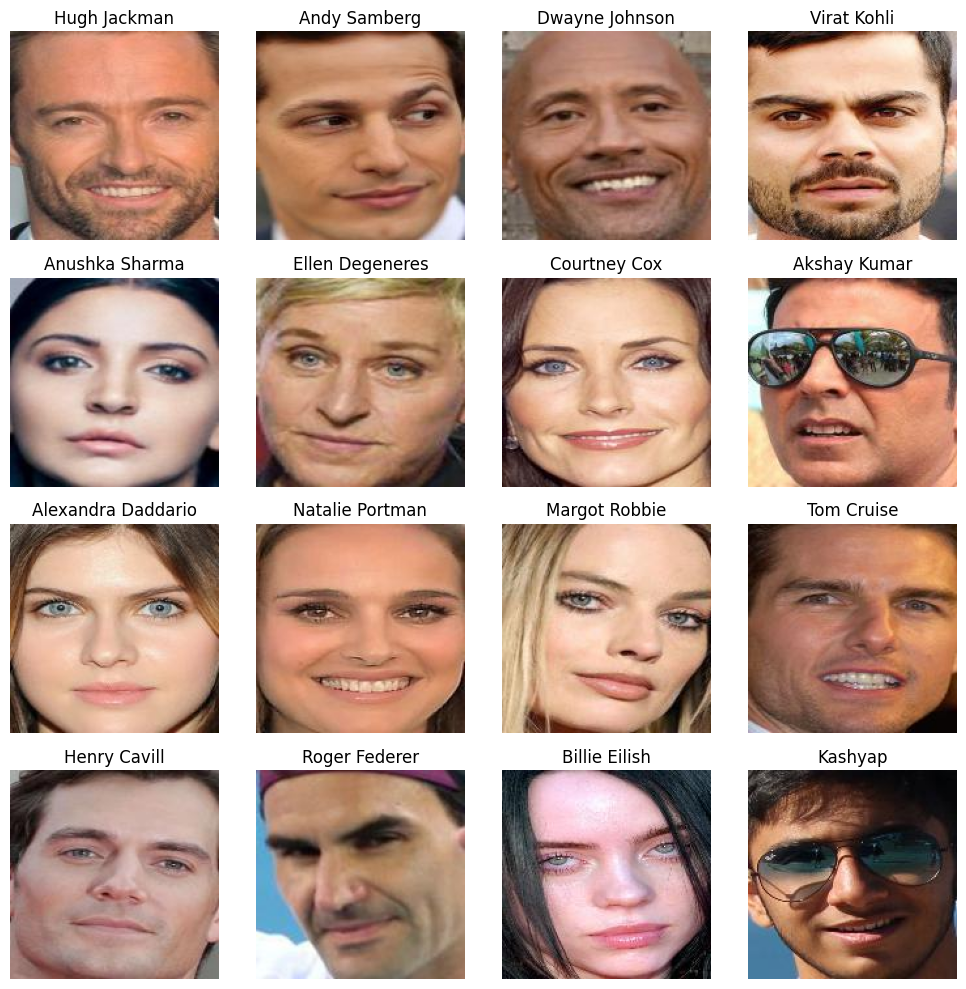

In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the dataset
dataset_path = '/kaggle/input/face-recognition-dataset/Dataset/Faces'

# Count total images and list directories
total_images = 0
celebrity_folders = os.listdir(dataset_path)

# Counting total images
for folder in celebrity_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        total_images += len(os.listdir(folder_path))

print(f"Total Number of Images: {total_images}")


selected_celebrities = random.sample(celebrity_folders, k=random.choice([16, 16]))

# Visualizing Sample Images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i, celeb in enumerate(selected_celebrities):
    celeb_folder = os.path.join(dataset_path, celeb)
    images = os.listdir(celeb_folder)
    random_image = random.choice(images)
    img_path = os.path.join(celeb_folder, random_image)

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(celeb)
    axes[i].axis('off')

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [17]:
import os
import matplotlib.image as mpimg

# Path to the dataset
dataset_path = '/kaggle/input/face-recognition-dataset/Dataset/Faces'

# List all celebrity folders
celebrity_folders = os.listdir(dataset_path)

# List to store paths of corrupted images
corrupted_images = []

# Check each image
for folder in celebrity_folders:
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        
        for image in images:
            img_path = os.path.join(folder_path, image)
            
            try:
                # Try to read the image
                img = mpimg.imread(img_path)
                
                # If the image is corrupted, an exception will be raised, and we'll catch it
                if img is None:
                    raise ValueError(f"Corrupted image: {img_path}")
                
            except Exception as e:
                # Log the corrupted image paths
                corrupted_images.append(img_path)
                print(f"Error with image {img_path}: {e}")

# If there are any corrupted images, display them
if corrupted_images:
    print(f"\nTotal corrupted images: {len(corrupted_images)}")
    print("List of corrupted images:")
    for img in corrupted_images:
        print(img)
else:
    print("\nAll images are working properly!")



All images are working properly!


In [18]:
import os

# Path to the 'Faces' directory
faces_path = '/kaggle/input/face-recognition-dataset/Dataset/Faces'

# Get all subdirectories in the Faces directory
directories = [d for d in os.listdir(faces_path) if os.path.isdir(os.path.join(faces_path, d))]

# Count the number of directories and images in each directory
for directory in directories:
    directory_path = os.path.join(faces_path, directory)
    images = [img for img in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, img))]
    print(f"Directory: {directory} | Image count: {len(images)}")


Directory: Alia Bhatt | Image count: 49
Directory: Charlize Theron | Image count: 49
Directory: Zac Efron | Image count: 49
Directory: Billie Eilish | Image count: 49
Directory: Jessica Alba | Image count: 49
Directory: Priyanka Chopra | Image count: 49
Directory: Natalie Portman | Image count: 49
Directory: Hrithik Roshan | Image count: 49
Directory: Tom Cruise | Image count: 49
Directory: Roger Federer | Image count: 49
Directory: Henry Cavill | Image count: 49
Directory: Amitabh Bachchan | Image count: 49
Directory: Brad Pitt | Image count: 49
Directory: Dwayne Johnson | Image count: 49
Directory: Kashyap | Image count: 30
Directory: Elizabeth Olsen | Image count: 49
Directory: Camila Cabello | Image count: 49
Directory: Vijay Deverakonda | Image count: 49
Directory: Courtney Cox | Image count: 49
Directory: Ellen Degeneres | Image count: 49
Directory: Margot Robbie | Image count: 49
Directory: Anushka Sharma | Image count: 49
Directory: Lisa Kudrow | Image count: 49
Directory: Marm

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

# Path to the Faces directory
faces_path = '/kaggle/input/face-recognition-dataset/Dataset/Faces'
output_path = '/kaggle/working/dataset'  # New path to save the split dataset

# Create new directories for training, validation, and testing
os.makedirs(os.path.join(output_path, 'training'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'validation'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'testing'), exist_ok=True)

# Iterate through the directories and process the images
directories = [d for d in os.listdir(faces_path) if os.path.isdir(os.path.join(faces_path, d))]
for directory in directories:
    directory_path = os.path.join(faces_path, directory)
    
    # Get all images in the directory
    images = [img for img in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, img))]
    
    # Convert images to grayscale and save them
    grayscale_images = []
    for img_name in images:
        img_path = os.path.join(directory_path, img_name)
        with Image.open(img_path) as img:
            gray_img = img.convert('L')  # Convert to grayscale
            grayscale_images.append((gray_img, img_name))
    
    # Split the images into training, validation, and testing sets (80% train, 10% val, 10% test)
    train_imgs, temp_imgs = train_test_split(grayscale_images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    # Function to save images in the respective folder
    def save_images(img_list, folder_name):
        class_folder = os.path.join(output_path, folder_name, directory)
        os.makedirs(class_folder, exist_ok=True)
        for img, img_name in img_list:
            img.save(os.path.join(class_folder, img_name))
    
    # Save images to their respective folders
    save_images(train_imgs, 'training')
    save_images(val_imgs, 'validation')
    save_images(test_imgs, 'testing')

print("Dataset processing completed.")


Dataset processing completed.


Visualizing training images:


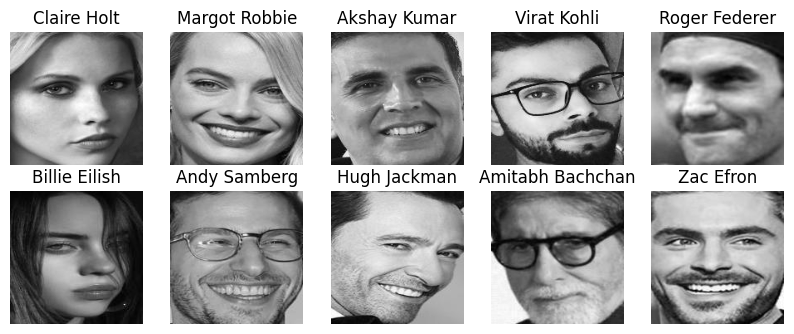

Visualizing validation images:


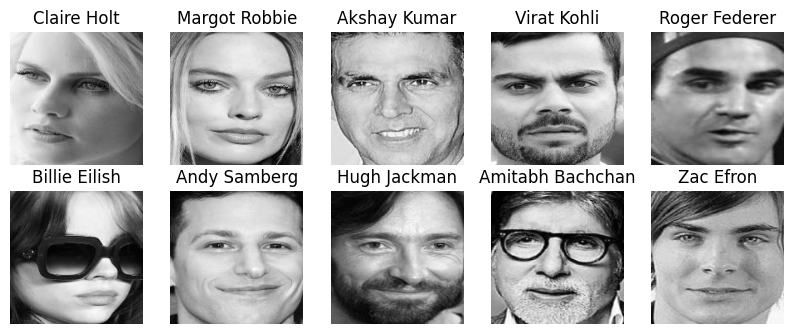

Visualizing testing images:


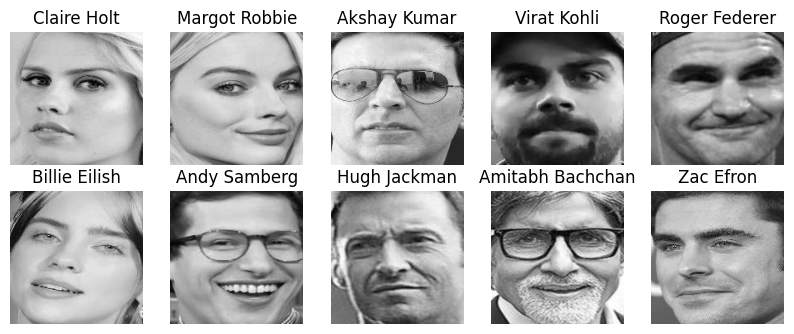

In [20]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the train, validation, and test directories
train_path = '/kaggle/working/dataset/training'
val_path = '/kaggle/working/dataset/validation'
test_path = '/kaggle/working/dataset/testing'

def visualize_images(folder_path):
    # Get a list of all class directories
    class_dirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    
    selected_images = []
    for class_dir in class_dirs:
        class_path = os.path.join(folder_path, class_dir)
        images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
        selected_images.extend([(class_dir, img) for img in random.sample(images, 1)])  # 1 image per class

        # Stop if we have selected 4 images
        if len(selected_images) >= 10:
            break

    # Display the images
    plt.figure(figsize=(10, 10))
    for i, (class_dir, img_name) in enumerate(selected_images):
        img_path = os.path.join(folder_path, class_dir, img_name)
        img = Image.open(img_path)
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{class_dir}")
        ax.axis('off')

    plt.show()

print("Visualizing training images:")
visualize_images(train_path)

print("Visualizing validation images:")
visualize_images(val_path)

print("Visualizing testing images:")
visualize_images(test_path)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Path to your saved model
model_path = '/kaggle/input/transfer_learning2/tensorflow2/default/1/Final_Model.h5'

# Load the pre-trained model
base_model = load_model(model_path)

# Display the model summary
base_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,518 (10.65 MB)

 Trainable params: 2,792,516 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load the pre-trained model
model_path = '/kaggle/input/transfer_learning2/tensorflow2/default/1/Final_Model.h5'
base_model = load_model(model_path)

# Unfreeze the last 20 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Pass the input through the base model
x = base_model(input_layer, training=True)

# Add additional layers
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
Dropout(0.4)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
Dropout(0.3)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
Dropout(0.2)(x)

# Output layer
output = Dense(4, activation='softmax')(x)

# Create the new model
model = tf.keras.Model(inputs=input_layer, outputs=output)

# Compile the model with a lower initial learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return 0.001  # Keep initial learning rate stable
    else:
        return lr * 0.9  # Gentle decay after 10 epochs

lr_scheduler = LearningRateScheduler(lr_schedule)

# Display the model summary
model.summary()




Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 4)                   │       2,792,516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,963,400 (11.30 MB)

 Trainable params: 2,961,608 (11.30 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/kaggle/working/dataset/training'
valid_dir = '/kaggle/working/dataset/validation'
test_dir = '/kaggle/working/dataset/testing'

# Define image dimensions
img_height = 224
img_width = 224
batch_size = 32

# Create ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model layers
base_model.trainable = False


model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global pooling layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(31, activation='softmax')  # Output layer for 31 classes (adjust as per your number of classes)
])


# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks to save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model.keras', monitor='val_loss', save_best_only=True, mode='min'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Optionally, you can save the final model if needed
model.save('/kaggle/working/final_model.keras')


Found 1180 images belonging to 31 classes.
Found 151 images belonging to 31 classes.
Found 152 images belonging to 31 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step - accuracy: 0.0683 - loss: 3.5029 - val_accuracy: 0.1562 - val_loss: 3.0382
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1562 - loss: 3.3107 - val_accuracy: 0.0870 - val_loss: 3.2382
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - accuracy: 0.1925 - loss: 2.9203 - val_accuracy: 0.1797 - val_loss: 2.8959
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2500 - loss: 2.6737 - val_accuracy: 0.3043 - val_loss: 2.6371
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.3141 - loss: 2.4765 - val_accuracy: 0.2891 - val_loss: 2.4380
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3438 - loss: 2.1965 - val_accuracy: 0.2174 - val_loss: 2.8132
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.3866 - loss: 2.1614 - val_accuracy: 0.3

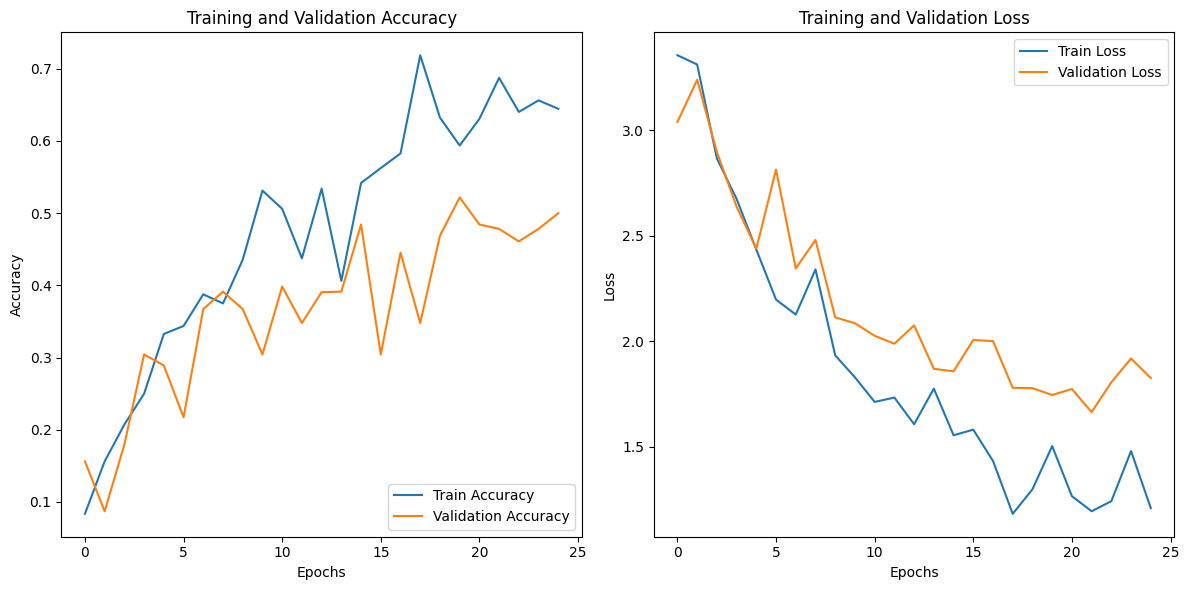

In [24]:
import matplotlib.pyplot as plt

# Assuming you have the `history` object after calling model.fit
# Example: history = model.fit(...)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()


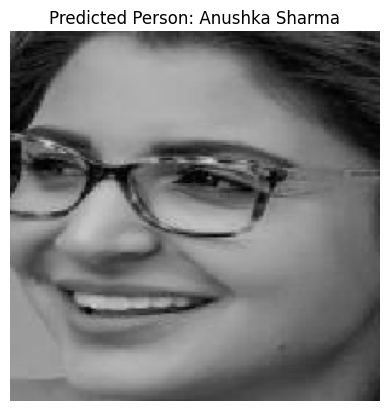

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class ID: [4]
Predicted person: Anushka Sharma


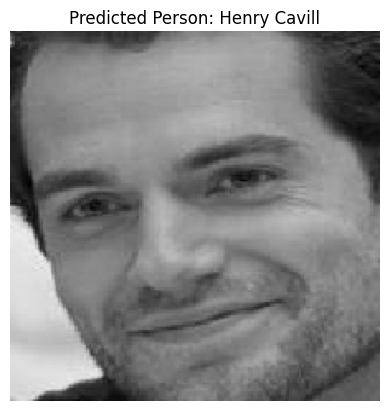

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class ID: [15]
Predicted person: Henry Cavill


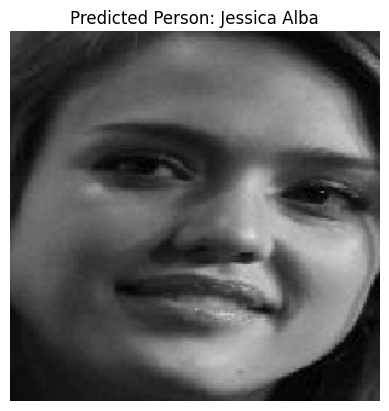

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class ID: [13]
Predicted person: Jessica Alba


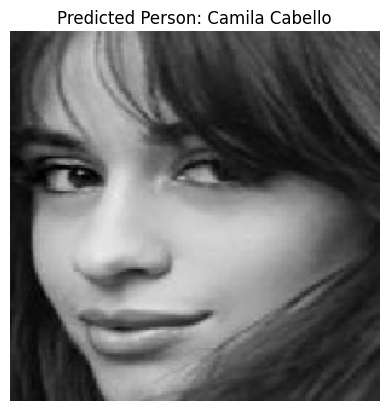

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class ID: [8]
Predicted person: Camila Cabello


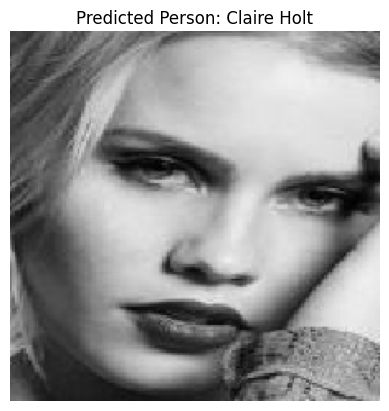

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class ID: [24]
Predicted person: Claire Holt


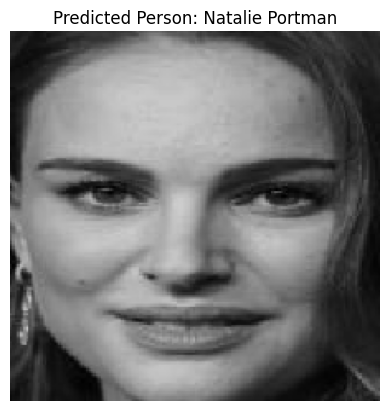

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class ID: [23]
Predicted person: Natalie Portman


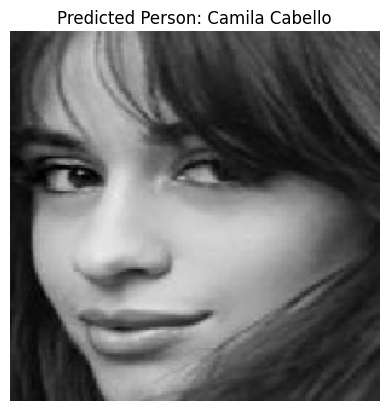

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class ID: [8]
Predicted person: Camila Cabello


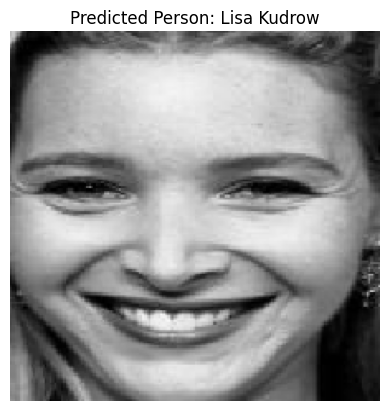

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class ID: [20]
Predicted person: Lisa Kudrow


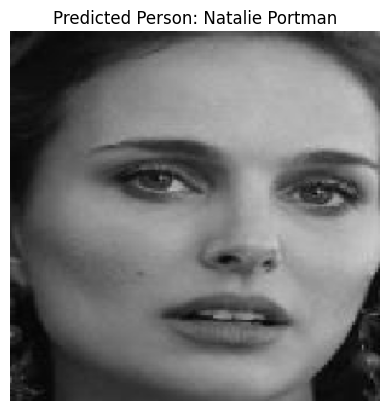

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class ID: [13]
Predicted person: Natalie Portman


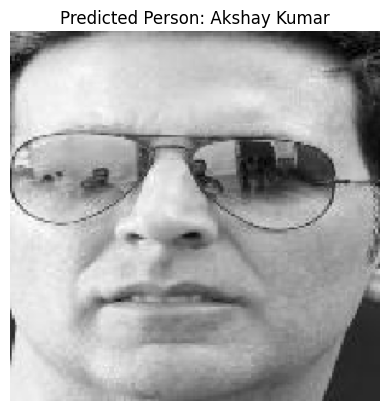

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class ID: [16]
Predicted person: Akshay Kumar


In [27]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the testing directory
test_dir = '/kaggle/working/dataset/testing'

people_dirs = os.listdir(test_dir)

num_predictions = 10

for _ in range(num_predictions):
    random_person = random.choice(people_dirs)

    person_dir = os.path.join(test_dir, random_person)
    image_files = [f for f in os.listdir(person_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        # Randomly select an image from the list
        random_image = random.choice(image_files)
        image_path = os.path.join(person_dir, random_image)
        
        # Load the image for prediction
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Display the selected image
        plt.imshow(img)
        plt.title(f"Predicted Person: {random_person}")
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)

        # Print the prediction
        print(f"Predicted class ID: {predicted_class}")
        print(f"Predicted person: {random_person}")
    else:
        print(f"No image files found in the selected directory: {random_person}")
